Assignment 1

Load packages:

In [44]:
try:
    from bs4 import BeautifulSoup
    import pandas
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
import requests

Perform ETL on the data:

In [43]:
opened_webpage = requests.get("https://www.estesparkweather.net/archive_reports.php?date=200605")

bs = BeautifulSoup(opened_webpage.content, "html.parser")

column_names = ["Name", "Average temperature",
           "Average humidity","Average dewpoint",
           "Average barometer","Average windspeed",
           "Average gustspeed","Average direction",
           "Rainfall for month","Rainfall for year",
           "Maximum rain per minute","Maximum temperature",
           "Minimum temperature","Maximum humidity",
           "Minimum humidity","Maximum pressure",
           "Minimum pressure","Maximum windspeed",
           "Maximum gust speed","Maximum heat index"]

raw_data = []

table = bs.find_all("table")

for row in table:
    line = row.text
    raw_data.append(line)

final_data = []

for l in raw_data:
    entries = l.split("\n")
    row = {} # empty dictionary for every row
    for entry in entries:
        for column_name in column_names:
            if column_name in entry:
                entry = entry.replace(column_name,"")
                row[column_name] = entry
                break 
    final_data.append(row)


final_data = pandas.DataFrame(final_data)

final_data.head()

number_of_duplicates = final_data.duplicated().sum()

final_data = final_data.drop_duplicates()

number_of_duplicates = final_data.duplicated().sum()


final_data = final_data.dropna()

def clearn_string_and_convert(s):
    s = s.replace("%","")
    s = s.replace("°F","")
    s = s.replace("in.","")
    s = s.replace("mph","")
    s = s.split(" ")[0]
    converted = float(s)
    return converted

final_data["Average temperature"] = final_data["Average temperature"].apply(clearn_string_and_convert)
final_data["Average humidity"] = final_data["Average humidity"].apply(clearn_string_and_convert)
final_data["Average dewpoint"] = final_data["Average dewpoint"].apply(clearn_string_and_convert)
final_data["Average barometer"] = final_data["Average barometer"].apply(clearn_string_and_convert)
final_data["Average windspeed"] = final_data["Average windspeed"].apply(clearn_string_and_convert)
final_data["Average gustspeed"] = final_data["Average gustspeed"].apply(clearn_string_and_convert)

final_data.head()

print(final_data["Average temperature"].describe())

final_data.to_csv("EstesPark_Weather_May_2006.csv")

count    32.000000
mean     52.090625
std       7.665733
min      37.400000
25%      48.400000
50%      52.450000
75%      58.425000
max      65.100000
Name: Average temperature, dtype: float64


Insights about data:

There is a big difference between the minimum and maximum values of this data, which means that there is a big difference in the temperature difference here during this month. The very large standard deviation can also explain this.


Do the data visualization:

Imported all libraries successfully...


Text(0.5, 1.0, 'Temperature progression in May 2006')

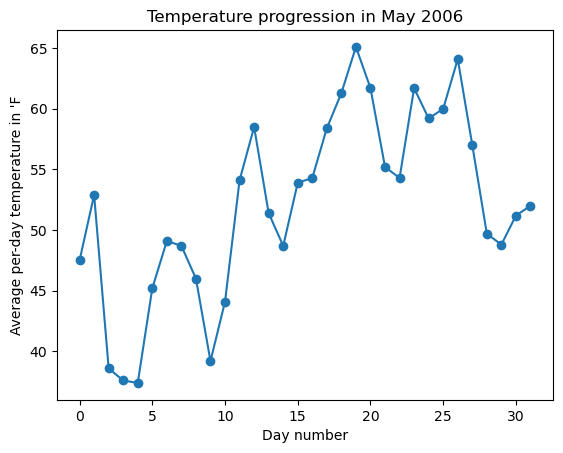

In [41]:
try:
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("Imported all libraries successfully...")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy
    print ("Some libraries not found, installing...")

day_ids = range(len(final_data["Average temperature"])) # creates a variable 0,1,2...total_days
temp_column = final_data["Average temperature"]

plt.plot(day_ids,temp_column, marker='o')

plt.xlabel("Day number")
plt.ylabel("Average per-day temperature in 'F")

# We can add a title too
plt.title("Temperature progression in May 2006")